In [2]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(
    r"C:\\Users\\wisnu\\OneDrive\\Documents\\Tugas Kuliah Semester 4\\MPML\\UAS\\archive (1)\\restaurant_menu_optimization_data.csv"
)


In [3]:
# Tampilkan data dan info
print("Contoh data:")
print(df.head())

print("\nInformasi kolom:")
print(df.info())

print("\nKolom yang tersedia:")
print(df.columns.tolist())

print("\nJumlah nilai kosong tiap kolom:")
print(df.isnull().sum())


Contoh data:
  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients  Price Profitability  
0                                   ['confidential']   2.55           Low  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  29.55          High  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  17.73        Medium  

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  ---

In [4]:
df = pd.read_csv("C:\\Users\\wisnu\\OneDrive\\Documents\\Tugas Kuliah Semester 4\\MPML\\UAS\\archive (1)\\restaurant_menu_optimization_data.csv")  
type(df)
print(df.isnull().sum())


RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


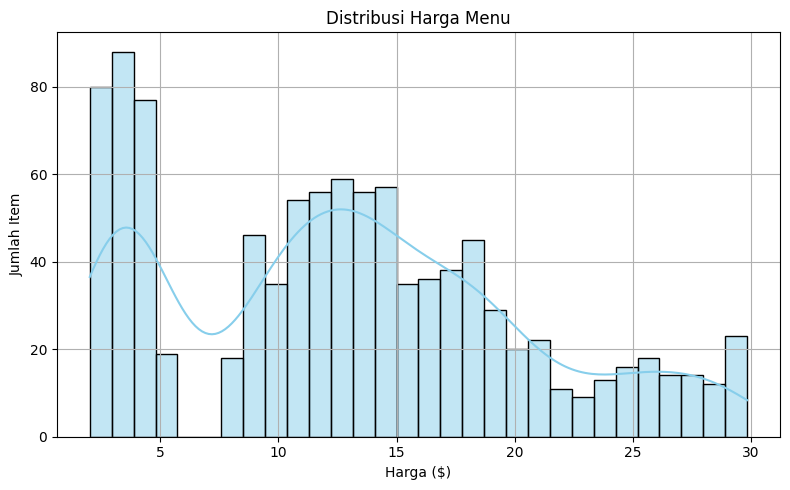

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Menu')
plt.xlabel('Harga ($)')
plt.ylabel('Jumlah Item')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\wisnu\AppData\Local\Temp\ipykernel_33012\192084453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


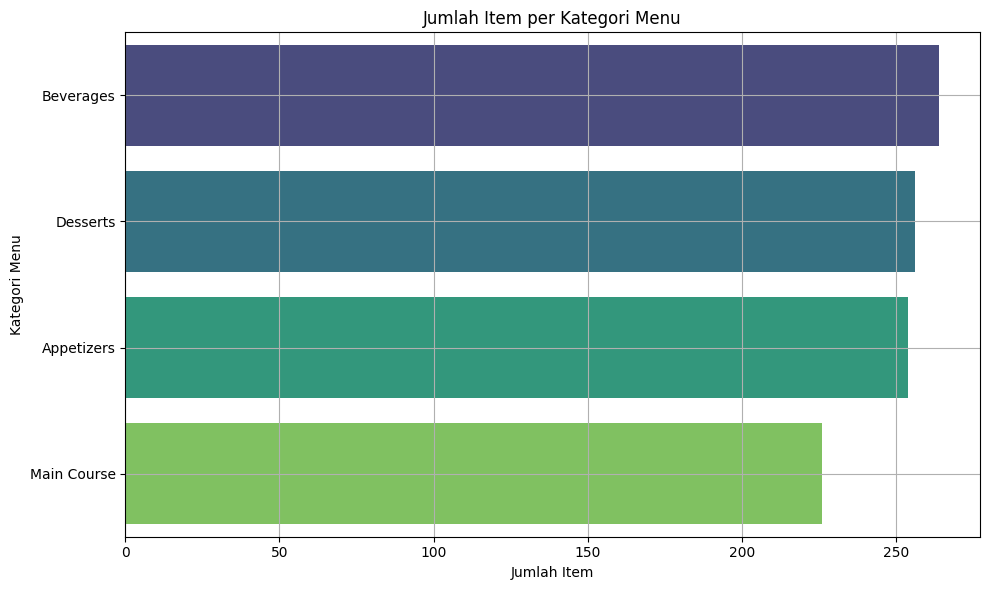

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='MenuCategory',
    data=df,
    order=df['MenuCategory'].value_counts().index,
    palette='viridis'
)
plt.title('Jumlah Item per Kategori Menu')
plt.xlabel('Jumlah Item')
plt.ylabel('Kategori Menu')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\wisnu\AppData\Local\Temp\ipykernel_33012\520554475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


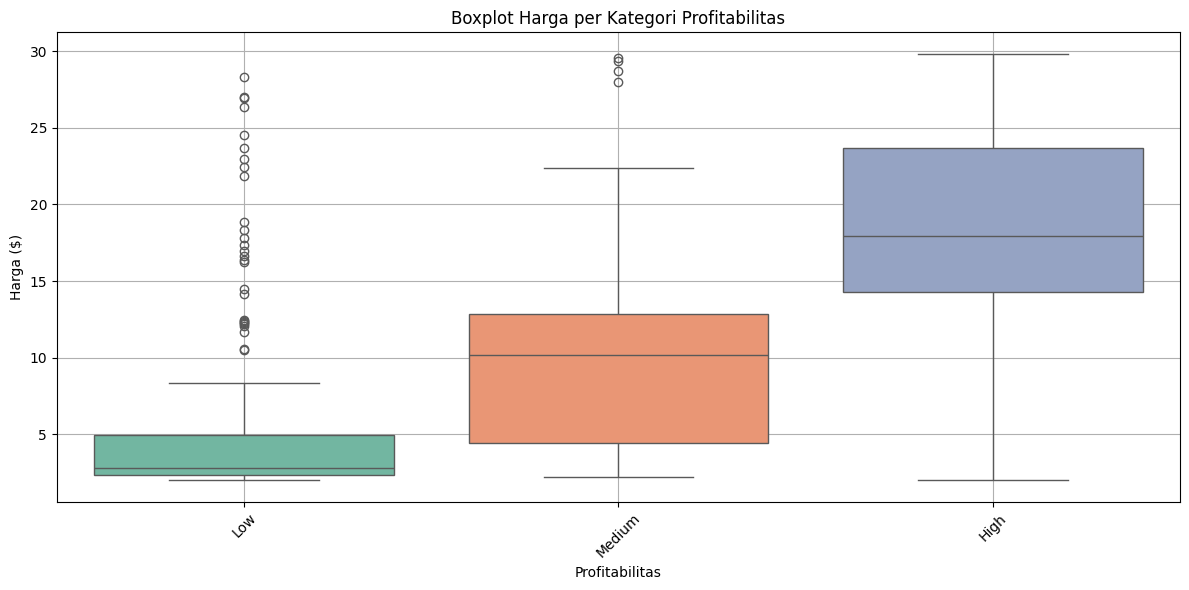

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Profitability',   # Asumsinya ini kolom kategorikal
    y='Price',
    data=df,
    palette='Set2'
)
plt.xticks(rotation=45)
plt.title('Boxplot Harga per Kategori Profitabilitas')
plt.xlabel('Profitabilitas')
plt.ylabel('Harga ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\wisnu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek encoder
le = LabelEncoder()

# Mengubah nilai 'Low', 'Medium', 'High' menjadi 0, 1, 2
df['Profitability_encoded'] = le.fit_transform(df['Profitability'])

# Jika ingin melihat hasil pemetaan
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping Label Encoding:", label_mapping)


Mapping Label Encoding: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}


In [10]:
from sklearn.preprocessing import StandardScaler


In [11]:
import ast

# Mengubah string list Ingredients jadi list Python dan menghitung jumlah bahan
df['IngredientCount'] = df['Ingredients'].apply(lambda x: len(ast.literal_eval(x)))


In [12]:
# Buat objek scaler
scaler = StandardScaler()

# Kolom numerik yang akan distandarisasi
numerical_cols = ['Price', 'IngredientCount']

# Fit dan transform data
df_scaled = scaler.fit_transform(df[numerical_cols])

# Konversi kembali ke DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# (Opsional) Gabungkan kembali ke df asli jika perlu
df[numerical_cols] = df_scaled

# Lihat hasil scaling
print(df.head())


  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients     Price Profitability  \
0                                   ['confidential'] -1.385057           Low   
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil'] -0.229045        Medium   
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  0.788029          High   
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  2.256986          High   
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  0.662581        Medium   

   Profitability_encoded  IngredientCount  
0                      1        -1.669694  
1                      2         0.598912  
2                      0         0.598912  
3                 

In [13]:
from sklearn.model_selection import train_test_split
# Misalnya kita akan menggunakan kolom numerik dan encoded sebagai fitur
X = df[['Price', 'IngredientCount']]  # Tambahkan fitur lain jika ada, seperti hasil one-hot encoding
y = df['Profitability_encoded']       # Target klasifikasi
# Membagi data menjadi 80% latih dan 20% uji dengan stratifikasi label
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% untuk data uji
    stratify=y,              # stratifikasi berdasarkan label target
    random_state=42          # agar hasil konsisten
)
# Distribusi label di data asli
print("Distribusi label (semua data):")
print(y.value_counts(normalize=True))

# Distribusi label di data latih
print("\nDistribusi label (data latih):")
print(y_train.value_counts(normalize=True))

# Distribusi label di data uji
print("\nDistribusi label (data uji):")
print(y_test.value_counts(normalize=True))


Distribusi label (semua data):
Profitability_encoded
2    0.495
0    0.386
1    0.119
Name: proportion, dtype: float64

Distribusi label (data latih):
Profitability_encoded
2    0.49500
0    0.38625
1    0.11875
Name: proportion, dtype: float64

Distribusi label (data uji):
Profitability_encoded
2    0.495
0    0.385
1    0.120
Name: proportion, dtype: float64


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("C:\\Users\\wisnu\\OneDrive\\Documents\\Tugas Kuliah Semester 4\\MPML\\UAS\\archive (1)\\restaurant_menu_optimization_data.csv")

# Tampilkan 5 baris pertama
print(df.head())


  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients  Price Profitability  
0                                   ['confidential']   2.55           Low  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  29.55          High  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  17.73        Medium  


In [16]:
# Drop kolom yang tidak relevan atau bersifat ID
X = df.drop(['RestaurantID', 'MenuItem', 'Ingredients', 'Profitability'], axis=1)
y = df['Profitability']

# One-hot encoding untuk kolom kategorikal
X = pd.get_dummies(X, drop_first=True)

# Scaling numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression:
              precision    recall  f1-score   support

        High       0.93      0.96      0.94        77
         Low       0.00      0.00      0.00        24
      Medium       0.81      0.98      0.89        99

    accuracy                           0.85       200
   macro avg       0.58      0.65      0.61       200
weighted avg       0.76      0.85      0.80       200



C:\Users\wisnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\wisnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\wisnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

Random Forest:
              precision    recall  f1-score   support

        High       0.89      0.87      0.88        77
         Low       0.89      0.67      0.76        24
      Medium       0.88      0.95      0.91        99

    accuracy                           0.89       200
   macro avg       0.89      0.83      0.85       200
weighted avg       0.89      0.89      0.88       200

SVM:
              precision    recall  f1-score   support

        High       0.93      0.99      0.96        77
         Low       1.00      0.04      0.08        24
      Medium       0.83      0.98      0.90        99

    accuracy                           0.87       200
   macro avg       0.92      0.67      0.64       200
weighted avg       0.89      0.87      0.82       200



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['LogReg', 'Random Forest', 'SVM']
accuracy = [accuracy_score(y_test, y_pred_lr),
            accuracy_score(y_test, y_pred_rf),
            accuracy_score(y_test, y_pred_svm)]

# Tambahkan average='weighted' untuk multiclass classification
precision = [precision_score(y_test, y_pred_lr, average='weighted'),
             precision_score(y_test, y_pred_rf, average='weighted'),
             precision_score(y_test, y_pred_svm, average='weighted')]

recall = [recall_score(y_test, y_pred_lr, average='weighted'),
          recall_score(y_test, y_pred_rf, average='weighted'),
          recall_score(y_test, y_pred_svm, average='weighted')]

f1 = [f1_score(y_test, y_pred_lr, average='weighted'),
      f1_score(y_test, y_pred_rf, average='weighted'),
      f1_score(y_test, y_pred_svm, average='weighted')]


C:\Users\wisnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Inisialisasi model
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
svm = SVC()

# Melatih model
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Prediksi
y_pred_lr = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)


In [20]:
# Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# SVM
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression:
              precision    recall  f1-score   support

        High       0.93      0.96      0.94        77
         Low       0.00      0.00      0.00        24
      Medium       0.81      0.98      0.89        99

    accuracy                           0.85       200
   macro avg       0.58      0.65      0.61       200
weighted avg       0.76      0.85      0.80       200

Random Forest:
              precision    recall  f1-score   support

        High       0.89      0.87      0.88        77
         Low       0.89      0.67      0.76        24
      Medium       0.88      0.95      0.91        99

    accuracy                           0.89       200
   macro avg       0.89      0.83      0.85       200
weighted avg       0.89      0.89      0.88       200

Support Vector Machine:
              precision    recall  f1-score   support

        High       0.93      0.99      0.96        77
         Low       1.00      0.04      0.08        24
      Medium   

C:\Users\wisnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\wisnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\wisnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# Tentukan ruang pencarian hyperparameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',  # karena multi-kelas
    n_jobs=-1,
    verbose=1
)

# Latih model dengan grid search
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Gunakan model terbaik
best_rf = grid_search.best_estimator_

# Evaluasi ulang dengan model terbaik
from sklearn.metrics import classification_report

y_pred_best = best_rf.predict(X_test)
print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

        High       0.93      0.99      0.96        77
         Low       0.94      0.62      0.75        24
      Medium       0.94      0.97      0.96        99

    accuracy                           0.94       200
   macro avg       0.94      0.86      0.89       200
weighted avg       0.94      0.94      0.93       200



In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np
import joblib
import json

# Setup Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# Loop manual
for train_index, test_index in skf.split(X_train, y_train):
    X_cv_train, X_cv_test = X_train[train_index], X_train[test_index]
    y_cv_train, y_cv_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Latih model
    best_rf.fit(X_cv_train, y_cv_train)

    # Prediksi dan hitung skor
    y_cv_pred = best_rf.predict(X_cv_test)
    score = f1_score(y_cv_test, y_cv_pred, average='weighted')
    cv_scores.append(score)

# Tampilkan hasil
print("Cross-Validation F1-weighted Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Simpan model ke file
joblib.dump(best_rf, "final_model.pkl")

# Simpan urutan fitur (harus sesuai dengan yang digunakan untuk training model)
json.dump(
    {"feature_names": ["Price", "IngredientCount"]},
    open("final_columns.json", "w")
)


Cross-Validation F1-weighted Scores: [0.900344702467344, 0.8996854432830043, 0.9225976906966491, 0.9350249725977348, 0.9225278900112233]
Mean F1 Score: 0.9160361398111909
Standard Deviation: 0.01385163545687027


In [27]:
import ast

# Mengonversi string Ingredients menjadi list dan hitung jumlahnya
df['IngredientCount'] = df['Ingredients'].apply(lambda x: len(ast.literal_eval(x)))


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle

# Fitur dan target
X = df[['Price', 'IngredientCount']]
y = df['Profitability'].map({'Low': 0, 'Medium': 1, 'High': 2})  # Kalau belum encoded

# Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X, y)

# Simpan ke file
with open("best_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Model disimpan sebagai: best_model.pkl")


✅ Model disimpan sebagai: best_model.pkl
